In [ ]:
#Install timm and fastai both which are open source deep learning models, timm is specifically for computer vision
%%capture
!pip install timm
!pip install fastai

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import timm
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#code to unzip the image folder

!unzip -q '/content/drive/MyDrive/Passion Fruit Disease Folder/Images (2).zip'

In [ ]:
#code to check the file full path
image_path = "ImageID_ZKDRLX3M.jpg"
full_path = os.path.abspath(image_path)
print(full_path)

/content/ImageID_ZKDRLX3M.jpg


In [ ]:
import fastai
print(fastai.__version__)

2.7.18


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Passion Fruit Disease Folder/Train (4).csv')
test_df = pd.read_csv('/content/drive/MyDrive/Passion Fruit Disease Folder/Test (2).csv')

In [ ]:
train_df.head()

,Image_ids,class
0,ImageID_ZWY4MO08,fruit_healthy
1,ImageID_OZQDOU6U,fruit_brownspot
2,ImageID_6HWHIAKO,fruit_healthy
3,ImageID_4F7HG2ZO,fruit_brownspot
4,ImageID_PFUD18TJ,fruit_brownspot


In [ ]:
test_df.head()

,Image_ids
0,ImageID_GXD1UROG
1,ImageID_U9W52JFZ
2,ImageID_18ZU2YP5
3,ImageID_8RBI9ZMH
4,ImageID_ZYJELERW


In [ ]:
train_df.shape, test_df.shape

((1548, 2), (516, 1))

In [ ]:
#check class distribution
train_df['class'].value_counts()

,count
class,
fruit_woodiness,573
fruit_brownspot,542
fruit_healthy,433


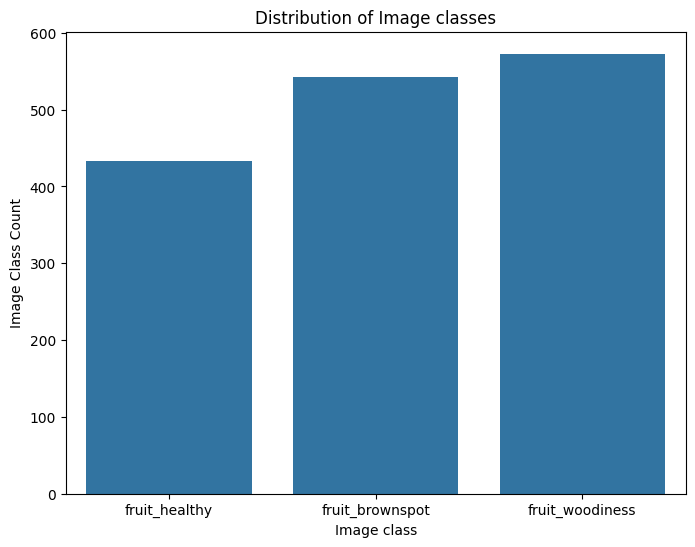

In [ ]:
#Lets visualize the distribution

plt.figure(figsize=(8,6))
sns.countplot(x=train_df['class'])
plt.title('Distribution of Image classes')
plt.xlabel('Image class')
plt.ylabel('Image Class Count')
plt.show()

In [ ]:
#set seed for reproducible results
#defines a function that takes in two values: 'seed_val','use_cuda'. seed_val set seed for consistent results while
#use_cuda takes in a boolean value, whether to set seed for CUDA(gpu_computations) operations
def random_seed(seed_val, use_cuda):
  np.random.seed(seed_val) #This ensures that any numpy-based random operations produce the same result every time.
  torch.manual_seed(seed_val) #This ensures reproducibility for PyTorch operations like random initialization of weights on the CPU.

  if use_cuda:
    torch.cuda.manual_seed(seed_val) #Sets the random seed for a single GPU.
    torch.cuda.manual_seed_all(seed_val) #Sets the seed for all GPUs if you’re using multiple GPUs.

    torch.backends.cudnn.deterministic = True #Ensures that CUDA's operations produce deterministic (repeatable) results.
    torch.backends.cudnn.benchmark = False #Disables some performance optimizations that could introduce randomness.


In [ ]:
random_seed(2025, True)

In [ ]:
Image.open('ImageID_ZRU7JOGA.jpg').size

(512, 512)

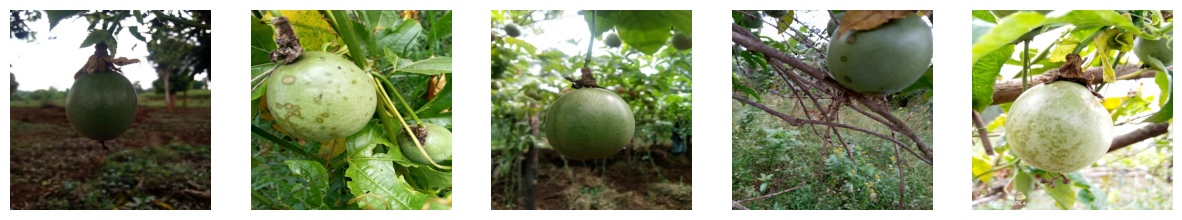

In [ ]:
from PIL import Image

image_paths = train_df.iloc[:5, 0]  # Get the first 5 file paths

# Display the first five images
plt.figure(figsize=(15, 5))
for i, path in enumerate(image_paths):
    full_path = f"/content/{path}.jpg"
    img = Image.open(full_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")
plt.show()


In [ ]:
#Next we create our datablock which is a High level API to quickly get the data in a DataLoaders
passion_fruit = DataBlock(
    blocks = (ImageBlock, CategoryBlock), #Image block specifies the images while the category block specifies the labels
    splitter = TrainTestSplitter(test_size=0.05, stratify=train_df['class']),
    get_x = ColReader(0, pref="/content/", suff=".jpg"), #Reads the first column (index 0) of the dataset to get the file paths or input images.
    item_tfms = Resize((320, 320), method='squish'),
    get_y = ColReader(1), #Reads the second column (index 1) of the dataset to get the corresponding labels or target values.
    batch_tfms = [*aug_transforms(do_flip=True,flip_vert=False,max_lighting=0.4,max_zoom=1.3,max_warp=0.2,
                                  max_rotate=30,xtra_tfms=None),Normalize.from_stats(*imagenet_stats)])

In [ ]:
#create dataloader which is a tool for feeding batches of the data to the model during training
#num_workers ensures that data loading process does not introduce randomness.
dls = passion_fruit.dataloaders(train_df, bs=16, num_workers=0)

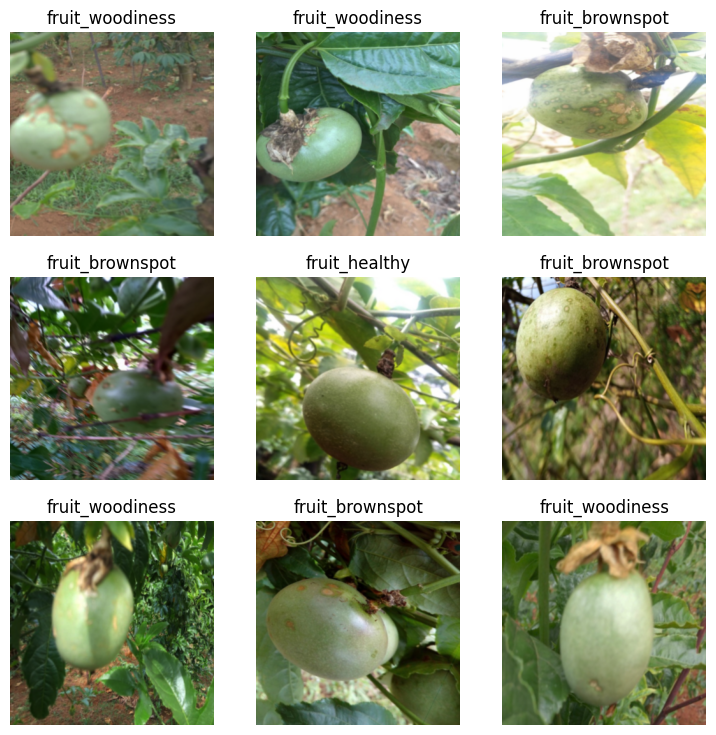

In [ ]:
#Lets check out a batch
dls.show_batch()

In [ ]:
batch = dls.one_batch()
new_size = batch[0]
print(new_size.shape)

torch.Size([16, 3, 320, 320])


In [ ]:
timm.list_models('res*')

['res2net50_14w_8s',
 'res2net50_26w_4s',
 'res2net50_26w_6s',
 'res2net50_26w_8s',
 'res2net50_48w_2s',
 'res2net50d',
 'res2net101_26w_4s',
 'res2net101d',
 'res2next50',
 'resmlp_12_224',
 'resmlp_24_224',
 'resmlp_36_224',
 'resmlp_big_24_224',
 'resnest14d',
 'resnest26d',
 'resnest50d',
 'resnest50d_1s4x24d',
 'resnest50d_4s2x40d',
 'resnest101e',
 'resnest200e',
 'resnest269e',
 'resnet10t',
 'resnet14t',
 'resnet18',
 'resnet18d',
 'resnet26',
 'resnet26d',
 'resnet26t',
 'resnet32ts',
 'resnet33ts',
 'resnet34',
 'resnet34d',
 'resnet50',
 'resnet50_clip',
 'resnet50_clip_gap',
 'resnet50_gn',
 'resnet50_mlp',
 'resnet50c',
 'resnet50d',
 'resnet50s',
 'resnet50t',
 'resnet50x4_clip',
 'resnet50x4_clip_gap',
 'resnet50x16_clip',
 'resnet50x16_clip_gap',
 'resnet50x64_clip',
 'resnet50x64_clip_gap',
 'resnet51q',
 'resnet61q',
 'resnet101',
 'resnet101_clip',
 'resnet101_clip_gap',
 'resnet101c',
 'resnet101d',
 'resnet101s',
 'resnet152',
 'resnet152c',
 'resnet152d',
 'resnet

In [ ]:
'''fc refers to the fully connected layer at the end of the pretrained model (the final classification layer).
In ResNet, .fc is the layer that maps the features extracted by the backbone network to the class predictions.
model._fc.in_features gets the number of input features (neurons) to the fully connected layer.
The pre-trained model has an fc layer that expects a certain number of inputs based on the pre-trained model architecture.
dls.c refers to the number of classes in your dataset. dls.c will be the target number of output neurons in the final layer (i.e., the number of classes in your classification problem).
'''
#========================== ==================================#
def get_model(dls,pretrained=True, **kwargs):
  model = timm.create_model(model_name, pretrained=pretrained)
  model.fc = nn.Linear(model.fc.in_features, dls.c)
  return model

In [ ]:
model_name = 'resnet18'

In [ ]:
resnet_model = get_model(dls)

In [ ]:
#Learner is a FastAI class that abstracts the training process of a model.
#It takes care of everything from data loading, model creation, training, and evaluation.
model_learn = Learner(dls, resnet_model, metrics=[error_rate, accuracy]).to_fp16() #(.to_fp16)speeds up training and reduces memory usage by using 16-bit floating-point arithmetic instead of 32-bit.

In [ ]:
#Find the best learning rate to use
model_learn.lr_find()

SuggestedLRs(valley=0.0006918309954926372)

In [ ]:
#Train model
#saveModelCallback saves the best model
model_learn.fine_tune(10, cbs=[SaveModelCallback(fname='best_model')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.733344,0.690949,0.230769,0.769231,00:17


Better model found at epoch 0 with valid_loss value: 0.6909486651420593.


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.200186,0.045956,0.000000,1.000000,00:17
1,0.145886,0.025364,0.000000,1.000000,00:17
2,0.123034,0.031107,0.012821,0.987179,00:17
3,0.094967,0.018319,0.000000,1.000000,00:17
4,0.075004,0.034257,0.000000,1.000000,00:17
5,0.067837,0.021266,0.012821,0.987179,00:17
6,0.044691,0.013701,0.000000,1.000000,00:18
7,0.029411,0.001431,0.000000,1.000000,00:17
8,0.023918,0.002025,0.000000,1.000000,00:18
9,0.019318,0.001556,0.000000,1.000000,00:16


Better model found at epoch 0 with valid_loss value: 0.045956097543239594.
Better model found at epoch 1 with valid_loss value: 0.025364404544234276.
Better model found at epoch 3 with valid_loss value: 0.01831899955868721.
Better model found at epoch 6 with valid_loss value: 0.013700742274522781.
Better model found at epoch 7 with valid_loss value: 0.0014309092657640576.


In [ ]:
test_df['Image_ids'] = test_df['Image_ids'].apply(lambda x: f"/content/{x}.jpg")
test_df.head()

,Image_ids
0,/content/ImageID_GXD1UROG.jpg
1,/content/ImageID_U9W52JFZ.jpg
2,/content/ImageID_18ZU2YP5.jpg
3,/content/ImageID_8RBI9ZMH.jpg
4,/content/ImageID_ZYJELERW.jpg


In [ ]:
#Apply Test Time Augmentation TTA
tdl = model_learn.dls.test_dl(test_df['Image_ids'])
test_preds_tta, test_labels_tta = model_learn.tta(dl=tdl, n=15) #Applies TTA

In [ ]:
#Generate predictions
predicted_classes = test_preds_tta.argmax(dim=1) #Convert probabilities to class indices
class_names = model_learn.dls.vocab #Map class names to index
predicted_labels = [class_names[i] for i in predicted_classes]

In [ ]:
sub_df = pd.DataFrame({'Image_ids': test_df['Image_ids'], 'Predictions': predicted_labels})
sub_df.head()

,Image_ids,Predictions
0,/content/ImageID_GXD1UROG.jpg,fruit_woodiness
1,/content/ImageID_U9W52JFZ.jpg,fruit_brownspot
2,/content/ImageID_18ZU2YP5.jpg,fruit_woodiness
3,/content/ImageID_8RBI9ZMH.jpg,fruit_brownspot
4,/content/ImageID_ZYJELERW.jpg,fruit_woodiness


In [ ]:
sub_df.shape

(516, 2)

In [ ]:
sub_df['Image_ids'] = sub_df['Image_ids'].str.replace(r'/content/|.jpg', '', regex=True)

sub_df.head()

,Image_ids,Predictions
0,ImageID_GXD1UROG,fruit_woodiness
1,ImageID_U9W52JFZ,fruit_brownspot
2,ImageID_18ZU2YP5,fruit_woodiness
3,ImageID_8RBI9ZMH,fruit_brownspot
4,ImageID_ZYJELERW,fruit_woodiness


In [ ]:
sub_df.to_csv('/content/drive/MyDrive/Passion Fruit Disease Folder/Submissions/submission_withresnet50_2.csv', index=False)